# 5xFAD Resting State EEG


In [1]:
import os
import dill as pickle
import scienceplots
import numpy as np
import pandas as pd
import seaborn as sns
import importlib

import tqdm.notebook as tqdm
from seaborn import color_palette

import openephysextract

from openephysextract.utilities import savify
from openephysextract.utilities import loadify

from matplotlib import pyplot as plt

plt.style.use(['science', 'grid'])
plt.rc('figure', titlesize = 33, figsize = (21, 7), dpi = 210)
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)

source = '/Volumes/STORAGE 1.0/UNIC Research/5xFAD Resting State'
channels = [3, 4, 5, 6, 7, 8]
sampling_rate = 30000
output_1 = os.path.join(source, 'processed')
output_2 = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis'

In [3]:
animals = pd.read_excel(
    '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/notes/MICE_LIST_EEG.xlsx', sheet_name='animals'
)

phenotypes = {}

for _, row in animals.iterrows():
    phenotypes[row['Animal ID']] = row['Phenotype']
    
animals

Animal ID Phenotype Implant date  n_electrodes  \
0       33H1        WT   2023-08-07             8   
1       33A7        WT   2023-08-07             8   
2       33A8        WT   2023-08-08             8   
3       33B1        WT   2023-08-08             8   
4       33C7        WT   2023-08-08             8   
5       33C5        WT   2023-08-08             8   
6       33E1        WT   2023-08-09             8   
7       33E3        WT   2023-08-10             8   
8       33E5        WT   2023-08-10             8   
9       33D7     5XFAD   2023-08-11             8   
10      33A4     5XFAD   2023-08-11             8   
11      33C1     5XFAD   2023-08-12             8   
12      33A5     5XFAD   2023-08-12             8   
13      33A6     5XFAD   2023-08-12             8   
14      33C2     5XFAD   2023-08-12             8   
15      33B2     5XFAD   2023-08-12             8   

                        electrode locations  \
0   n/c1,n/c2,FrAL,FrAR,M1L*,M1R*,S1L*,S1R*   
1       n/c1,n/c2,olfL,olfR,M1L,M1R,S1L,S1R   
2     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
3     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
4     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
5     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
6     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
7     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
8     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
9     n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
10    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
11    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
12    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
13    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
14    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   
15    n/c1,n/c2,M1L,M1R,S1L,S1R,V1/2L,V1/2R   

                                  to delete  \
0   FrAL,FrAR,M1L*,M1R*,S1L*,S1R*,GNDL,GNDR   
1       olfL,olfR,M1L,M1R,S1L,S1R,GNDL,GNDR   
2     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
3     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
4     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
5     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
6     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
7     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
8     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
9     M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
10    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
11    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
12    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
13    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
14    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   
15    M1L,M1R,S1L,S1R,V1/2L,V1/2R,GNDL,GNDR   

                                             Comments  
0   Starred electrodes had to go in more posterior...  
1   After this surgery olfactory bulb was replaced...  
2                                            all good  
3                                            all good  
4                                            all good  
5   small mouse strange pre-op stereotypic behavio...  
6   GNDs not visualised properly due to excessive ...  
7                            some ctx damage under M1  
8                                            all good  
9                                            all good  
10  GNDR too tight, maybe did not break through co...  
11                                           all good  
12                                  S1L not connected  
13                                           all good  
14                                           all good  
15                                           all good

## I Preprocessing

### I.I Extraction

In [ ]:
importlib.reload(openephysextract.extractor)
from openephysextract.extractor import Extractor  

extractor = Extractor(
    source = source,
    channels = channels,
    sampling_rate = sampling_rate,
    output = output_1,
)

out = extractor.extractify(export = True)

### I.II Preprocessing

1, 2 primary motor cortex <br>
3, 4 S1 L + R <br>
5, 6 V1/V2 L + R <br>

In [ ]:
with open(os.path.join(output_1, 'raw_data.pkl'), 'rb') as f:
    extracted = pickle.load(f)

In [ ]:
import openephysextract.preprocess
importlib.reload(openephysextract.preprocess)
from openephysextract.preprocess import (
    Preprocessor,
    RemoveBadStep,
    FilterStep,
    DownsampleStep,
    EpochStep
)

# Step 2 — Define your preprocessing pipeline
steps = [
    RemoveBadStep(alpha=0.3, beta=0.7),
    DownsampleStep(target_fs=300),
    FilterStep(lowcut=0.1, highcut=80, order=4),
    EpochStep(frame=300, stride=30),
]

# Step 3 — Instantiate and run the processor
processor = Preprocessor(trials=extracted, steps=steps, destination=output_2)
processor.preprocess(parallel=False, export=True)

## II Analysis

In [ ]:
processed = loadify(output_2, 'preprocessed_trials.pkl')

### II.I PSD Analysis

In [ ]:
import openephysextract.analysis
importlib.reload(openephysextract.analysis)
from openephysextract.analysis import bandpower

features = [bandpower(trial) for trial in processed]

savify(features, output_2, 'features')

In [ ]:
features = loadify(output_2, 'features')

### II.II Logistic Scaling (Garwood et. al)

In [ ]:
import openephysextract.analysis
importlib.reload(openephysextract.analysis)
from openephysextract.analysis import logistic_scaler as scaler

scaled = [scaler(trial) for trial in features]

savify(scaled, output_2, "logistic-scaled")

In [11]:
scaled = loadify(output_2, "logistic-scaled")
scaled[0].data.shape

Loaded from /Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis/logistic-scaled.pkl


(3523, 4, 5)

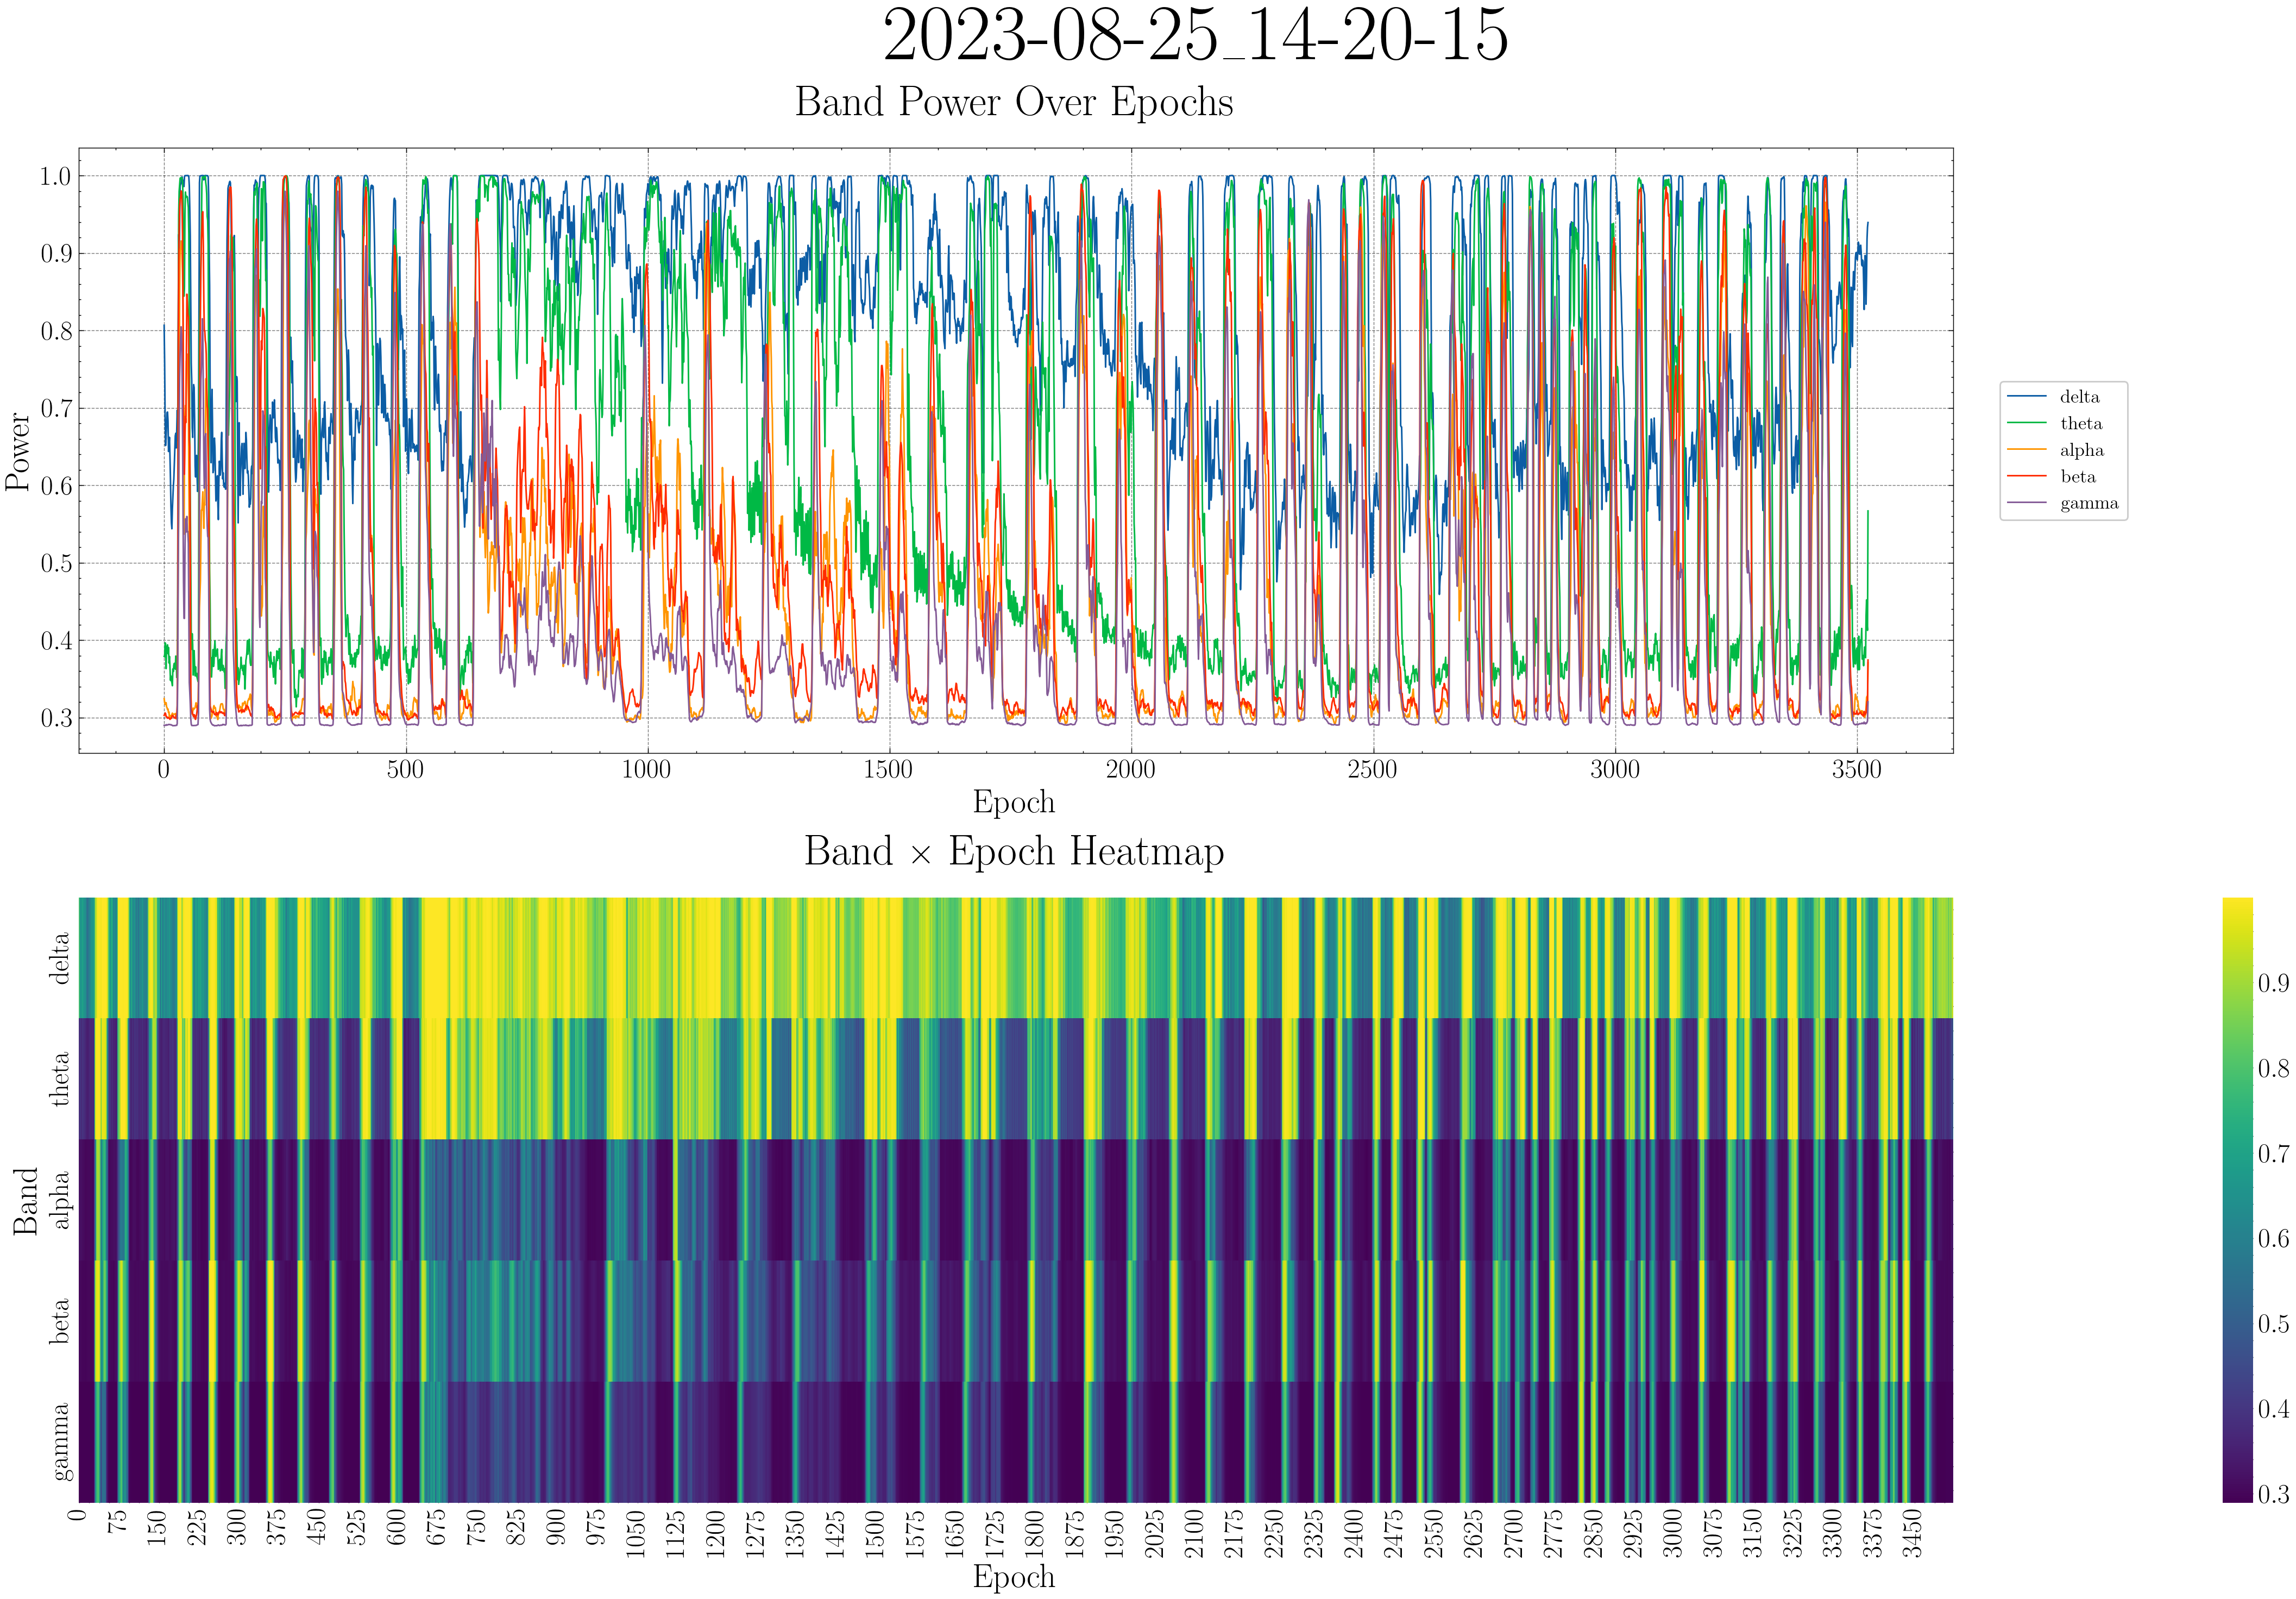

In [9]:
import openephysextract.plot
importlib.reload(openephysextract.plot)
from openephysextract.plot import plotifyEEGbands

plotifyEEGbands(scaled[0])

In [2]:
importlib.reload(openephysextract.utilities)
from openephysextract.utilities import spreadsheet

notes = spreadsheet(
    location = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/notes',
    name = 'MICE_LIST_EEG.xlsx',
    id = 'Session',
    relevant = [trial.trial for trial in scaled],
    sheet = 'MEP'
)

notes['group'] = notes['AnimalID'].map(phenotypes)

for trial in scaled:
    info = notes[notes['Session'] == trial.trial].iloc[0].to_dict()
    trial.add_notes(info)
    
savify(scaled, output_2, 'logistic-scaled-with-notes')

NameError: name 'scaled' is not defined

## III beta-HMM Construction

### III.I 

In [8]:
import numpy as np
from scipy.special import logsumexp
from scipy.stats import beta
from tqdm import tqdm

class BetaHMM:
    """
    Hidden Markov Model with beta emission distributions.
    Optimized for vectorized forward/backward and EM convergence.
    """
    def __init__(self, n_states, n_features, seed=None):
        self.K = n_states
        self.D = n_features
        self.rng = np.random.default_rng(seed)

        # model parameters
        self.pi = self.rng.dirichlet(np.ones(self.K))               # initial state distribution
        self.A  = self.rng.dirichlet(np.ones(self.K), size=self.K)  # transition matrix
        # beta parameters to ensure unimodal; will be re-estimated
        self.alpha = self.rng.uniform(1.5, 3.0, size=(self.K, self.D))
        self.beta  = self.rng.uniform(1.5, 3.0, size=(self.K, self.D))

    def _compute_ll(self, Y):
        """
        Compute log-likelihood matrix of shape (N, K).
        """
        Y = np.clip(Y, 1e-6, 1 - 1e-6)
        return np.stack([
            np.sum(beta.logpdf(Y, self.alpha[k], self.beta[k]), axis=1)
            for k in range(self.K)
        ], axis=1)

    def _forward(self, LL, log_pi, log_A):
        N, K = LL.shape
        log_alpha = np.zeros((N, K))
        log_alpha[0] = log_pi + LL[0]
        for n in range(1, N):
            log_alpha[n] = LL[n] + logsumexp(log_alpha[n-1][:, None] + log_A, axis=0)
        return log_alpha

    def _backward(self, LL, log_A):
        N, K = LL.shape
        log_beta = np.zeros((N, K))
        for n in range(N-2, -1, -1):
            log_beta[n] = logsumexp(
                log_A + LL[n+1][None, :] + log_beta[n+1][None, :],
                axis=1
            )
        return log_beta

    def _compute_gamma_xi(self, log_alpha, log_beta, LL, log_A):
        N, K = log_alpha.shape
        # gamma: posterior state marginals
        log_gamma = log_alpha + log_beta
        log_gamma -= logsumexp(log_gamma, axis=1, keepdims=True)
        gamma = np.exp(log_gamma)

        # xi: posterior transition counts
        xi = np.zeros((N-1, K, K))
        for n in range(N-1):
            log_xi_raw = (
                    log_alpha[n][:, None] + log_A +
                    LL[n+1][None, :] + log_beta[n+1][None, :]
            )
            log_xi = log_xi_raw - logsumexp(log_xi_raw)
            xi[n] = np.exp(log_xi)
        return gamma, xi

    def em_step(self, Y):
        LL      = self._compute_ll(Y)
        log_pi  = np.log(np.clip(self.pi, 1e-12, 1.0))
        log_A   = np.log(np.clip(self.A,  1e-12, 1.0))
        log_a   = self._forward(LL, log_pi, log_A)
        log_b   = self._backward(LL, log_A)
        gamma, xi = self._compute_gamma_xi(log_a, log_b, LL, log_A)

        # M-step: update pi and A
        self.pi = gamma[0]
        A_counts = xi.sum(axis=0)
        self.A = A_counts / A_counts.sum(axis=1, keepdims=True)

        # update beta parameters via weighted moments
        for k in range(self.K):
            w = gamma[:, k]
            w_sum = w.sum()
            if w_sum < 1e-8:
                continue
            mean = (w[:, None] * Y).sum(axis=0) / w_sum
            var  = (w[:, None] * (Y - mean)**2).sum(axis=0) / w_sum
            var  = np.clip(var, 1e-4, None)
            v    = np.maximum(mean * (1 - mean) / var - 1, 1e-2)
            self.alpha[k] = np.clip(mean * v,     1e-2, 1e2)
            self.beta[k]  = np.clip((1 - mean)*v, 1e-2, 1e2)

        return logsumexp(log_a[-1])

    def fit(self, Y, max_iters=100, tol=1e-4):
        """
        Run EM until convergence or max iterations on a single sequence.
        """
        prev_ll = -np.inf
        for _ in range(max_iters):
            ll = self.em_step(Y)
            if ll - prev_ll < tol:
                break
            prev_ll = ll
        return self

    def fit_multi(self, Y_list, max_iters=50, tol=1e-4):
        """
        Fit a single Beta-HMM across multiple independent sequences.
        """
        prev_ll = -np.inf

        for _ in tqdm(range(max_iters)):
            total_ll = 0.0
            # Reset accumulators each iteration
            pi_acc      = np.zeros(self.K)
            A_acc       = np.zeros((self.K, self.K))
            sum_weight  = np.zeros(self.K)
            sum_Y       = np.zeros((self.K, self.D))
            sum_Y2      = np.zeros((self.K, self.D))

            # E-step: loop over trials
            for Y in Y_list:
                LL      = self._compute_ll(Y)
                log_pi  = np.log(np.clip(self.pi, 1e-12, 1.0))
                log_A   = np.log(np.clip(self.A,  1e-12, 1.0))
                log_a   = self._forward(LL, log_pi, log_A)
                log_b   = self._backward(LL, log_A)
                gamma, xi = self._compute_gamma_xi(log_a, log_b, LL, log_A)

                total_ll += logsumexp(log_a[-1])
                pi_acc   += gamma[0]
                A_acc    += xi.sum(axis=0)

                for k in range(self.K):
                    w = gamma[:, k]
                    sum_weight[k] += w.sum()
                    sum_Y[k]      += (w[:, None] * Y).sum(axis=0)
                    sum_Y2[k]     += (w[:, None] * (Y**2)).sum(axis=0)

            # M-step: update shared parameters
            self.pi = pi_acc / pi_acc.sum()
            self.A  = A_acc  / A_acc.sum(axis=1, keepdims=True)

            for k in range(self.K):
                mean = sum_Y[k] / sum_weight[k]
                var  = (sum_Y2[k] / sum_weight[k]) - mean**2
                var  = np.clip(var, 1e-4, None)
                prec = np.maximum(mean * (1 - mean) / var - 1, 1e-2)
                self.alpha[k] = np.clip(mean * prec,     1e-2, 1e2)
                self.beta[k]  = np.clip((1 - mean)*prec, 1e-2, 1e2)

            if total_ll - prev_ll < tol:
                break
            prev_ll = total_ll

        return self

    def viterbi(self, Y):
        """
        Decode one sequence into its most likely state path.
        """
        LL    = self._compute_ll(Y)
        N, K  = LL.shape
        delta = np.zeros((N, K))
        psi   = np.zeros((N, K), dtype=int)

        delta[0] = np.log(np.clip(self.pi, 1e-12, 1.0)) + LL[0]
        log_A    = np.log(np.clip(self.A, 1e-12, 1.0))

        for n in range(1, N):
            scores     = delta[n-1][:, None] + log_A
            psi[n]     = np.argmax(scores, axis=0)
            delta[n]   = scores[psi[n], range(K)] + LL[n]

        states = np.zeros(N, dtype=int)
        states[-1] = np.argmax(delta[-1])
        for n in range(N-2, -1, -1):
            states[n] = psi[n+1, states[n+1]]

        return states

    def viterbi_multi(self, Y_list):
        """
        Decode each sequence in Y_list independently.
        """
        return [self.viterbi(Y) for Y in Y_list]


### III.II Model Order Selection

In [3]:
trials = loadify(output_2, 'logistic-scaled-with-notes')

Loaded from /Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis/logistic-scaled-with-notes.pkl


In [6]:
Ys = [t.data.reshape(t.data.shape[0], -1) for t in trials]

  6%|▌         | 3/50 [00:12<03:11,  4.08s/it]


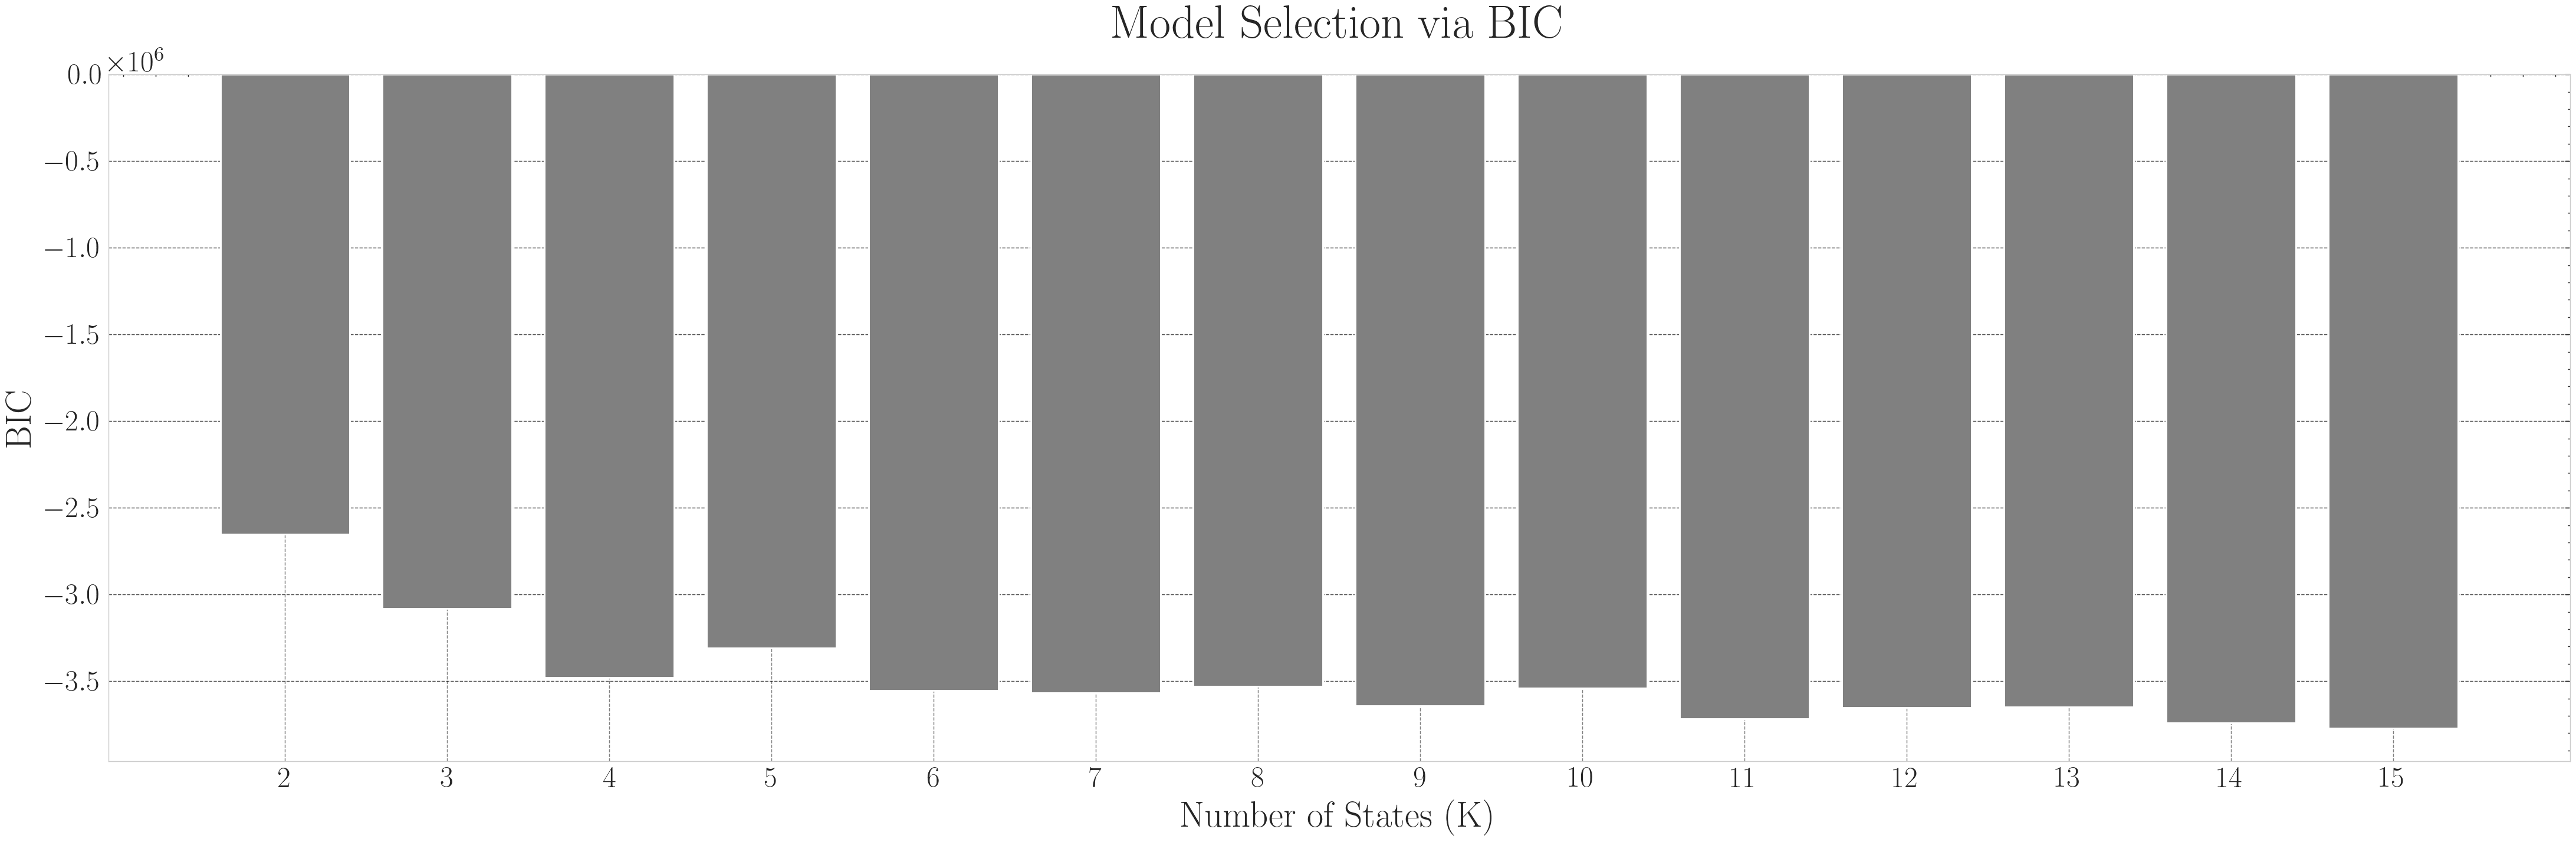

Saved to /Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis/beta_hmm_models.pkl


In [17]:
bic_scores = []

models = {}

Ks = range(2, 16)
for K in Ks:
    model = BetaHMM(n_states=K, n_features=Ys[0].shape[1], seed=0)
    model.fit_multi(Ys)
    ll = sum(model._compute_ll(Y).max(axis=1).sum() for Y in Ys)  # or store EM log-likelihood
    N_total = sum(Y.shape[0] for Y in Ys)

    p = (K - 1) + K*(K - 1) + 2 * K * model.D
    bic = -2 * ll + p * np.log(N_total)
    bic_scores.append(bic)
    
    models[K] = model
    
best_K = Ks[np.argmin(bic_scores)]
colors = ['red' if i == best_K else 'gray' for i in range(len(Ks))]

plt.figure(figsize=(21, 7), dpi = 210)
plt.bar(Ks, bic_scores, color=colors)
plt.xlabel('Number of States (K)')
plt.ylabel('BIC')
plt.title('Model Selection via BIC')
plt.xticks(Ks)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

savify(models, output_2, 'beta_hmm_models')

In [100]:
best_K, bic_scores, models

(15,
 [-2651738.3567978535,
  -3082658.166701314,
  -3479403.1150675267,
  -3310055.9381487714,
  -3555207.096914644,
  -3568413.1746347267,
  -3529648.7711789915,
  -3643395.615889492,
  -3539380.255593138,
  -3718511.402683962,
  -3652231.9047006764,
  -3647961.53916165,
  -3740428.8876672904,
  -3772712.0865041837],
 {'K: 2': <__main__.BetaHMM at 0x3278e0f10>,
  'K: 3': <__main__.BetaHMM at 0x327a86f10>,
  'K: 4': <__main__.BetaHMM at 0x327d6c160>,
  'K: 5': <__main__.BetaHMM at 0x325b44070>,
  'K: 6': <__main__.BetaHMM at 0x327af33d0>,
  'K: 7': <__main__.BetaHMM at 0x3278e09a0>,
  'K: 8': <__main__.BetaHMM at 0x3278e0ee0>,
  'K: 9': <__main__.BetaHMM at 0x325b7cb50>,
  'K: 10': <__main__.BetaHMM at 0x325b7c790>,
  'K: 11': <__main__.BetaHMM at 0x325b7c9d0>,
  'K: 12': <__main__.BetaHMM at 0x327d82a60>,
  'K: 13': <__main__.BetaHMM at 0x327d82820>,
  'K: 14': <__main__.BetaHMM at 0x327d828b0>,
  'K: 15': <__main__.BetaHMM at 0x327d82a30>})

In [4]:
models = loadify(output_2, 'beta_hmm_models')

Loaded from /Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis/beta_hmm_models.pkl


In [9]:
from tqdm import tqdm

states = {}
for K, model in tqdm(models.items()):
    K = int(K)
    states[K] = model.viterbi_multi(Ys)

100%|██████████| 14/14 [00:11<00:00,  1.20it/s]


### III.III Visualising Dynamics

#### III.III.I State Trajectory

In [10]:
def find_most_consistent_state(seqs):
    """
    Given a list of integer state sequences (each of length T_i),
    find the state k whose first‐entry times (across trials that visit it)
    have the smallest variance.
    """
    first_times = {}
    for seq in seqs:
        for k in np.unique(seq):
            idx = np.where(seq == k)[0]
            if idx.size:
                first_times.setdefault(k, []).append(idx[0])
    # only consider states seen in at least half the trials
    n_trials = len(seqs)
    cons = {}
    for k, times in first_times.items():
        if len(times) >= n_trials/2:
            cons[k] = np.var(times)
    if not cons:
        return None
    return min(cons, key=cons.get)

def align_on_state(seqs, state, window):
    """
    Align each seq at its first entry into `state`, take exactly `window` steps after.
    """
    aligned = []
    for seq in seqs:
        idx = np.where(seq == state)[0]
        if idx.size:
            start = idx[0]
            if start + window <= len(seq):
                aligned.append(seq[start:start+window])
    return np.stack(aligned) if aligned else np.empty((0,window),dtype=int)

In [11]:
Ks = [2, 3, 4, 8]
trial = 5
sequence = states[K][trial]
n_epochs = 500

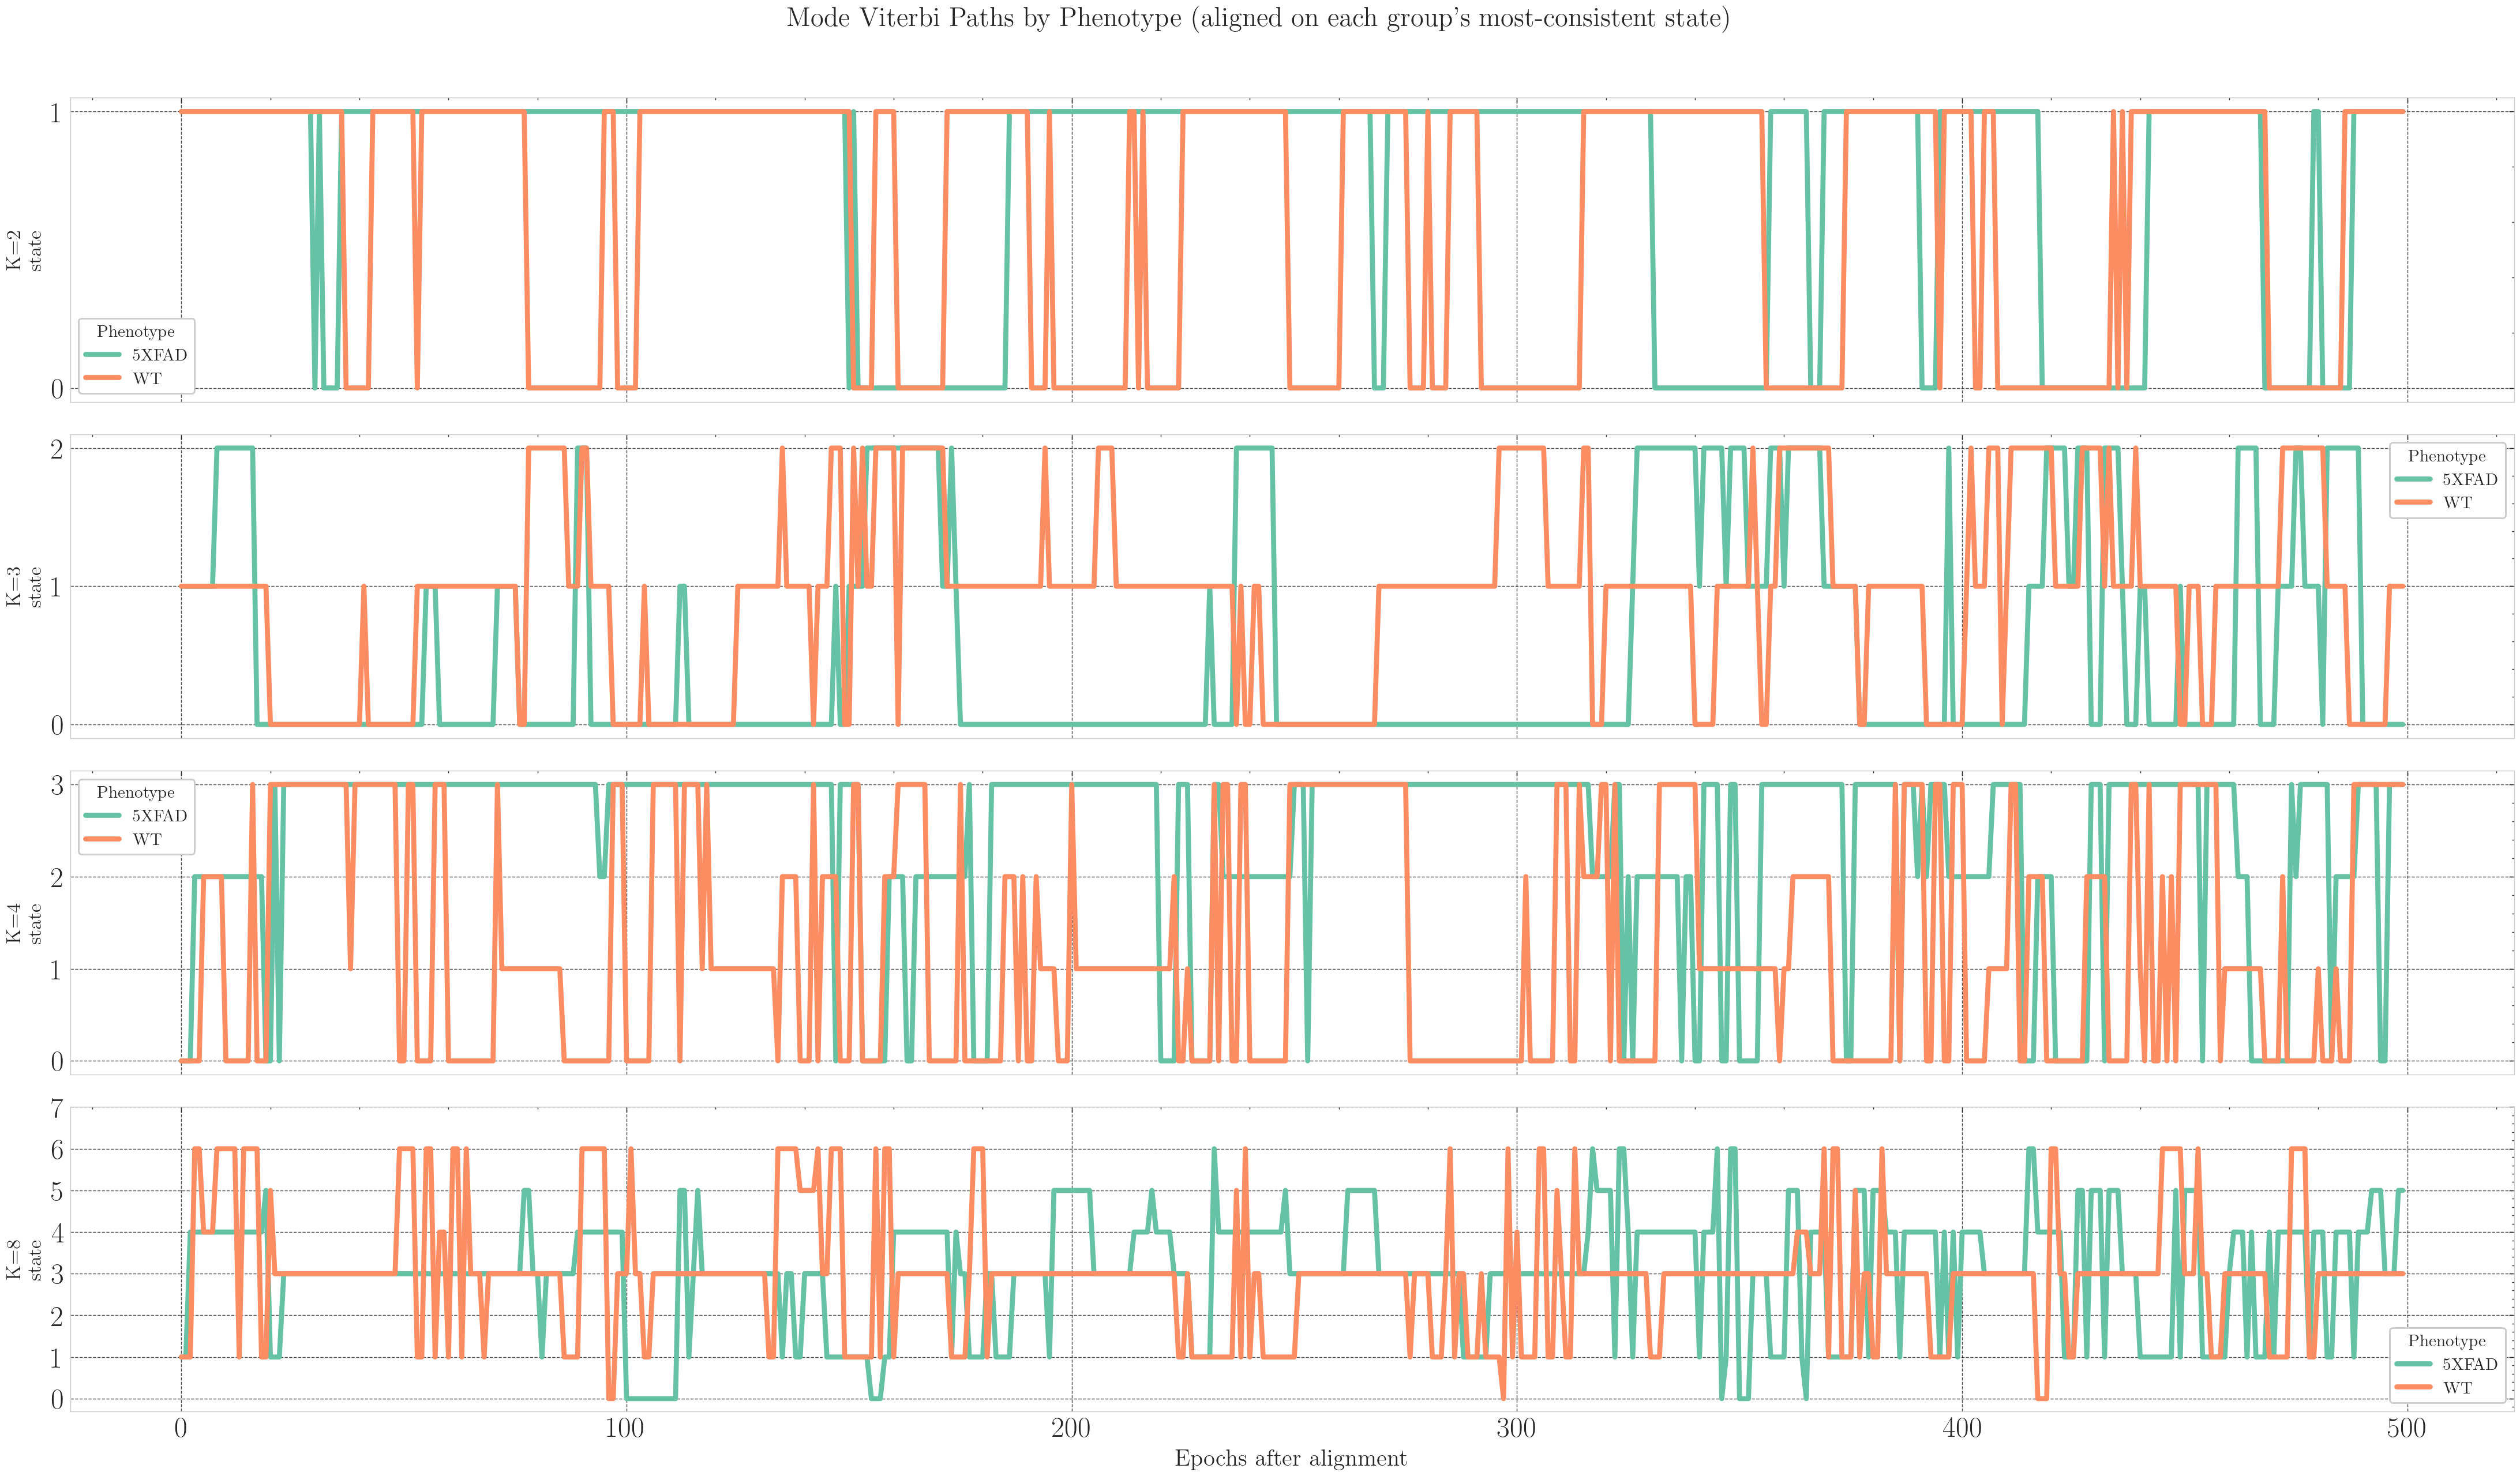

In [12]:
from scipy.stats import mode

colors = sns.color_palette('Set2', len(Ks))

phenotypes   = sorted({ tr.notes['group'] for tr in trials })
colors       = sns.color_palette('Set2', len(phenotypes))

fig, axs = plt.subplots(len(Ks), 1, figsize=(21, 3*len(Ks)), sharex=True, dpi = 210)

for ax, K in zip(axs, Ks):
    for ph, color in zip(phenotypes, colors):
        # pick out only those trials of this phenotype
        idxs      = [i for i,tr in enumerate(trials) if tr.notes['group']==ph]
        ph_seqs   = [states[K][i] for i in idxs]

        # find the best “anchor” 
        # state & align
        best_st   = find_most_consistent_state(ph_seqs)
        if best_st is None:
            continue

        aligned   = align_on_state(ph_seqs, best_st, n_epochs)
        if aligned.size == 0:
            continue

        # compute the across‐trial mode path
        mode_path = mode(aligned, axis=0).mode.flatten()
        ax.plot(mode_path,
                lw=3.0,
                label=ph,
                color=color)

    ax.set_ylabel(f'K={K}\nstate', fontsize=12)
    ax.set_yticks(range(K))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Phenotype')

axs[-1].set_xlabel('Epochs after alignment', fontsize=14)
plt.suptitle('Mode Viterbi Paths by Phenotype (aligned on each group’s most‐consistent state)',
             y=1.02,
             fontsize=16)
plt.tight_layout()
plt.show()


#### III.III.II State Occupancy + Dwell Times

In [13]:
import itertools

rows = []

groups = sorted({trial.notes['group'] for trial in trials})

Ks_sorted = sorted(states.keys())

for K, trial_seqs in states.items():
    for group in groups:
        occ_accum   = {k: [] for k in range(K)}
        dwell_accum = {k: [] for k in range(K)}

        for i, seq in enumerate(trial_seqs):
            if trials[i].notes['group'] != group:
                continue

            # Occupancy: fraction of time in each state
            for k in range(K):
                occ_accum[k].append(np.mean(seq == k))

            # Dwell time: mean length of each visit to each state
            for k_run, g in itertools.groupby(seq):
                if k_run in dwell_accum:
                    dwell_accum[k_run].append(len(list(g)))

        # Store mean across trials
        for k in range(K):
            rows.append({
                'K': K,
                'group': group,
                'state': k,
                'occupancy': np.mean(occ_accum[k]) if occ_accum[k] else 0,
                'dwell_time': np.mean(dwell_accum[k]) if dwell_accum[k] else 0
            })

# Final tidy DataFrame
metrics = pd.DataFrame(rows)
metrics.head()

groups_sorted = sorted(metrics['group'].unique())
states_all = sorted(metrics['state'].unique())
state_colors = sns.color_palette('tab20', len(states_all))

In [17]:
def plot_metric(metric_name, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35
    x_pos = np.arange(len(Ks_sorted))

    handles = []

    for gi, group in enumerate(groups_sorted):
        offset = (gi - 0.5) * bar_width  # side-by-side bars per K
        hatch = '///' if group == '5XFAD' else ''  # differentiate group visually
        alpha = 0.9 if group == 'WT' else 0.6       # optional: use transparency too

        for ki, K in enumerate(Ks_sorted):
            df_sub = metrics[(metrics['K'] == K) & (metrics['group'] == group)]
            df_sub = df_sub.sort_values('state')

            bottom = 0
            for _, row in df_sub.iterrows():
                state_idx = row['state']
                height = row[metric_name]
                color = state_colors[state_idx]

                bar = ax.bar(
                    x=x_pos[ki] + offset,
                    height=height,
                    bottom=bottom,
                    width=bar_width,
                    color=color,
                    hatch=hatch,
                    alpha=alpha,
                    edgecolor='black' if state_idx == 0 else None,
                    label=f"{group} — State {state_idx}"
                )
                bottom += height

    ax.set_xticks(x_pos)
    ax.set_xticklabels(Ks_sorted)
    ax.set_xlabel('Number of States (K)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.3)

    # custom legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    ax.legend(
        by_label.values(),
        by_label.keys(),
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        title='Group — State',
        borderaxespad=0.
    )

    # Give extra room on the right for the legend
    fig.subplots_adjust(right=0.8)
    plt.show()

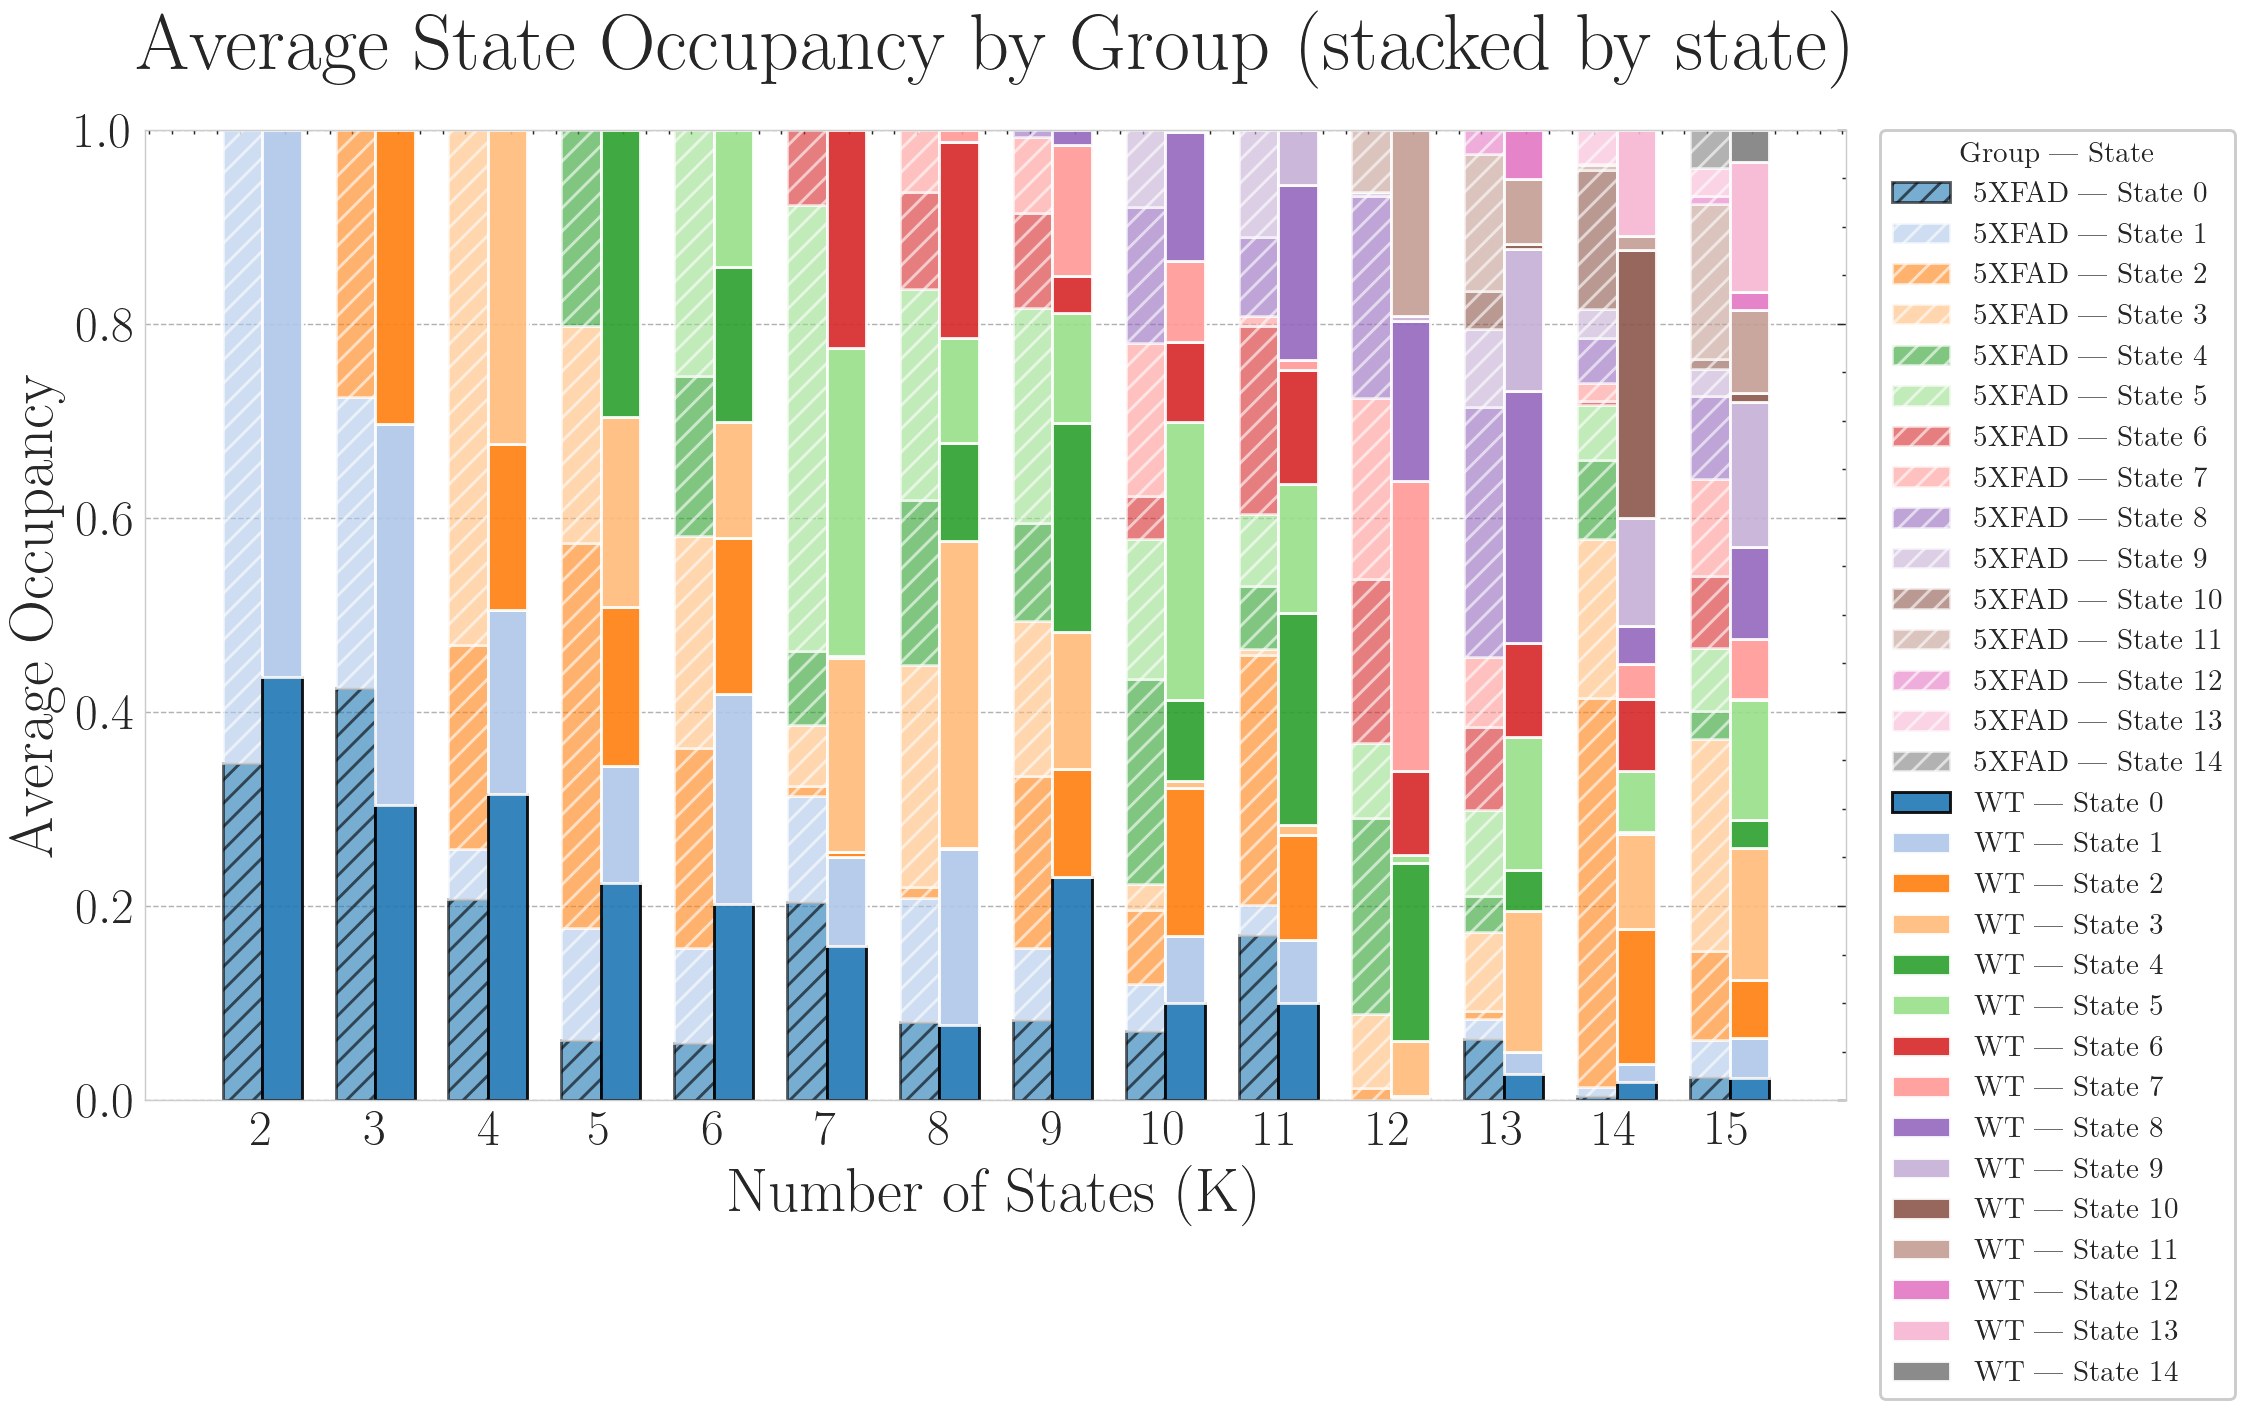

In [18]:
plot_metric(
    metric_name='occupancy',
    ylabel='Average Occupancy',
    title='Average State Occupancy by Group (stacked by state)'
)

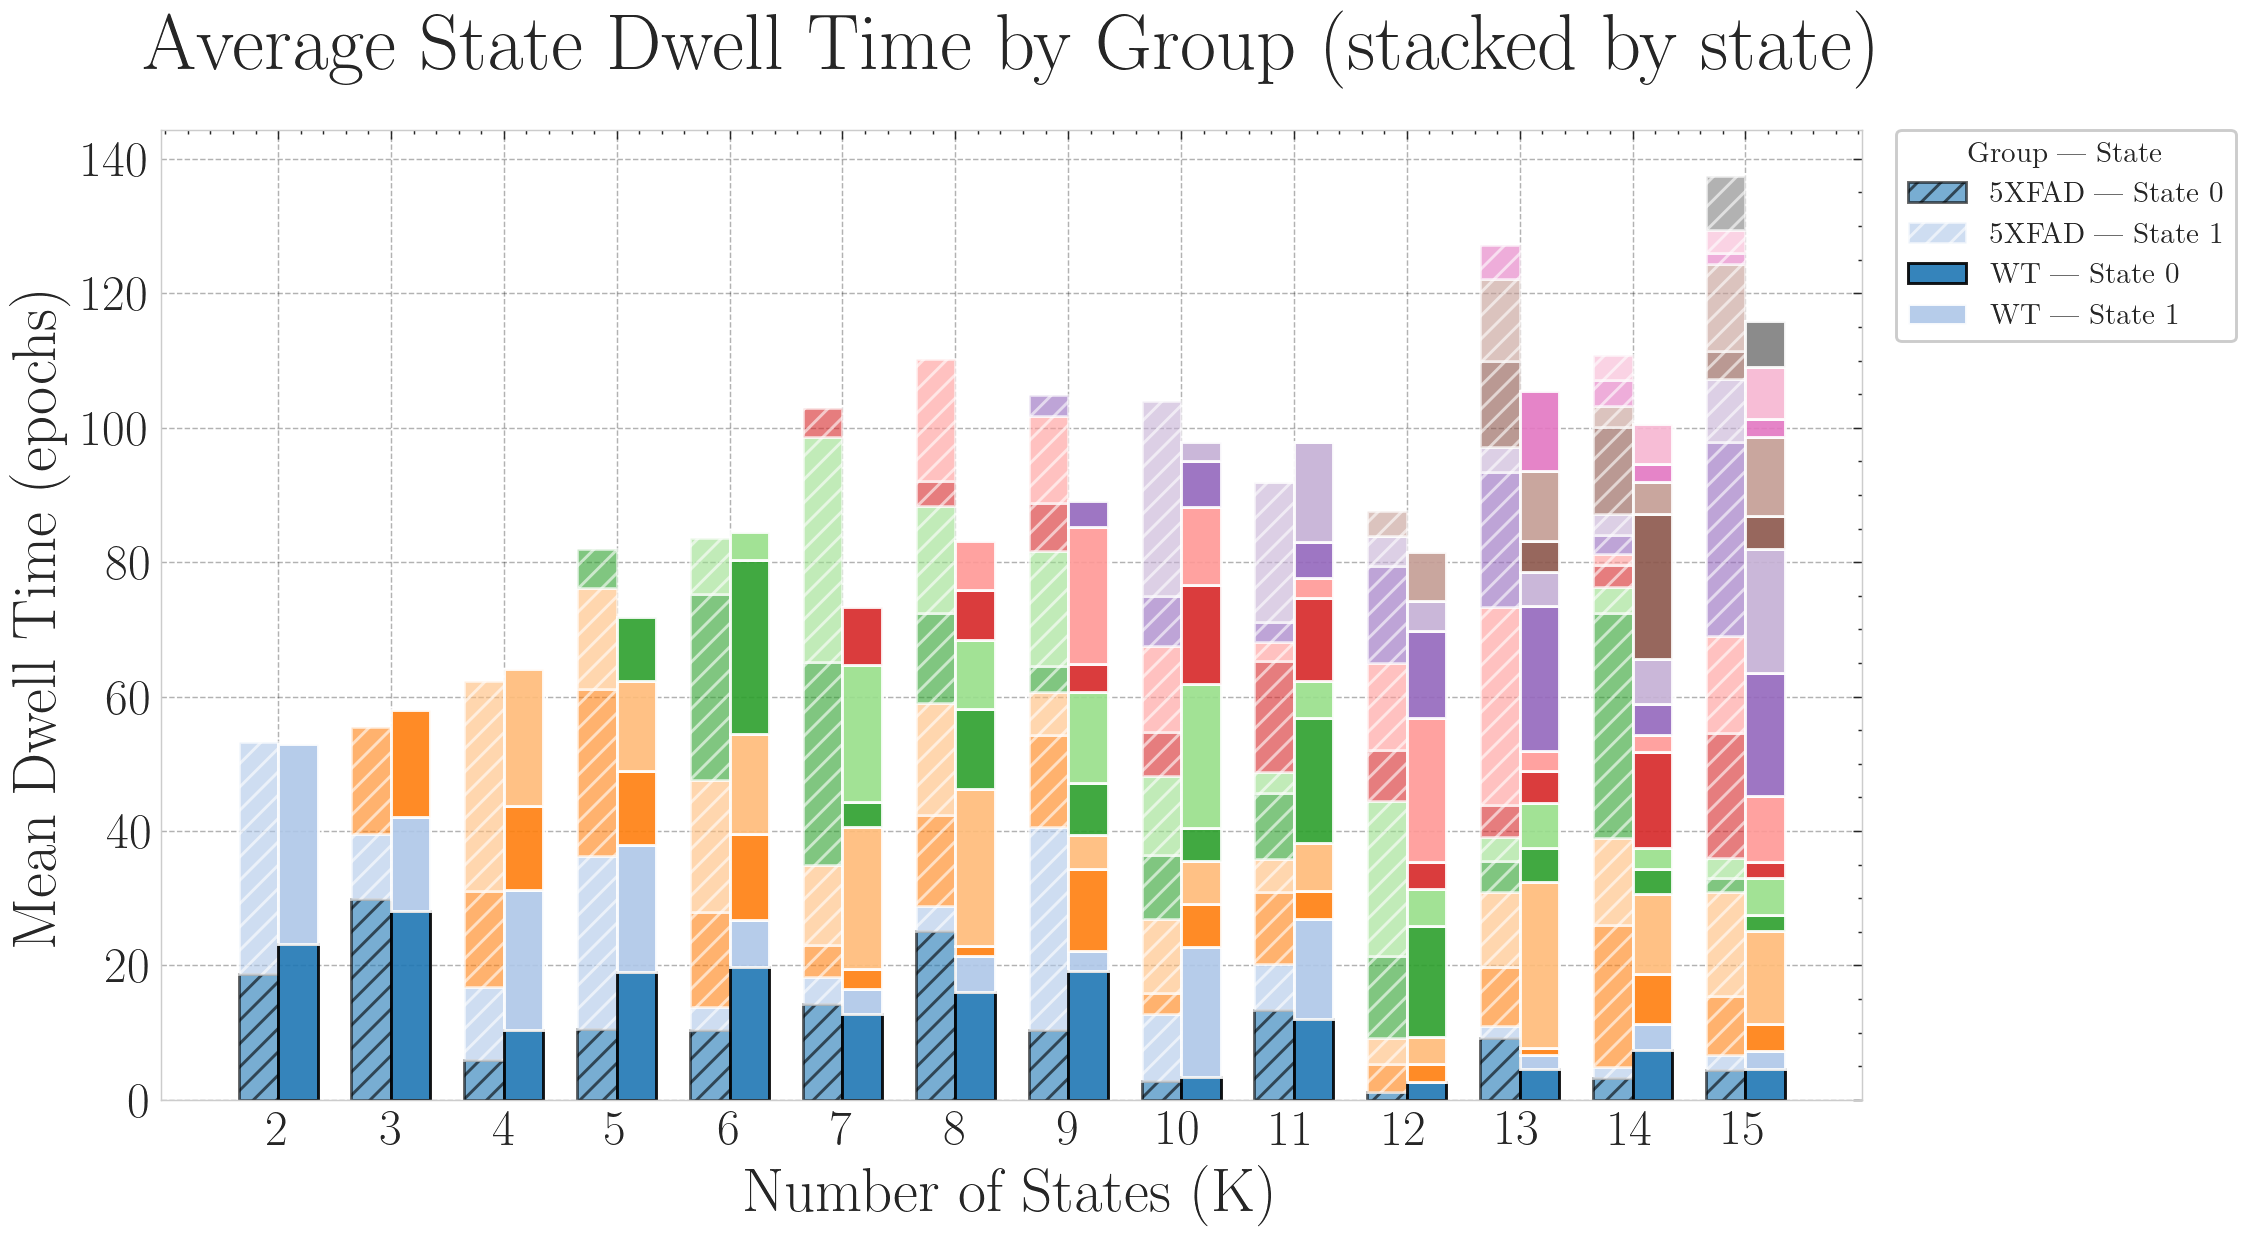

In [16]:
plot_metric(
    metric_name='dwell_time',
    ylabel='Mean Dwell Time (epochs)',
    title='Average State Dwell Time by Group (stacked by state)'
)

#### III.III.III Transition matrix heatmap

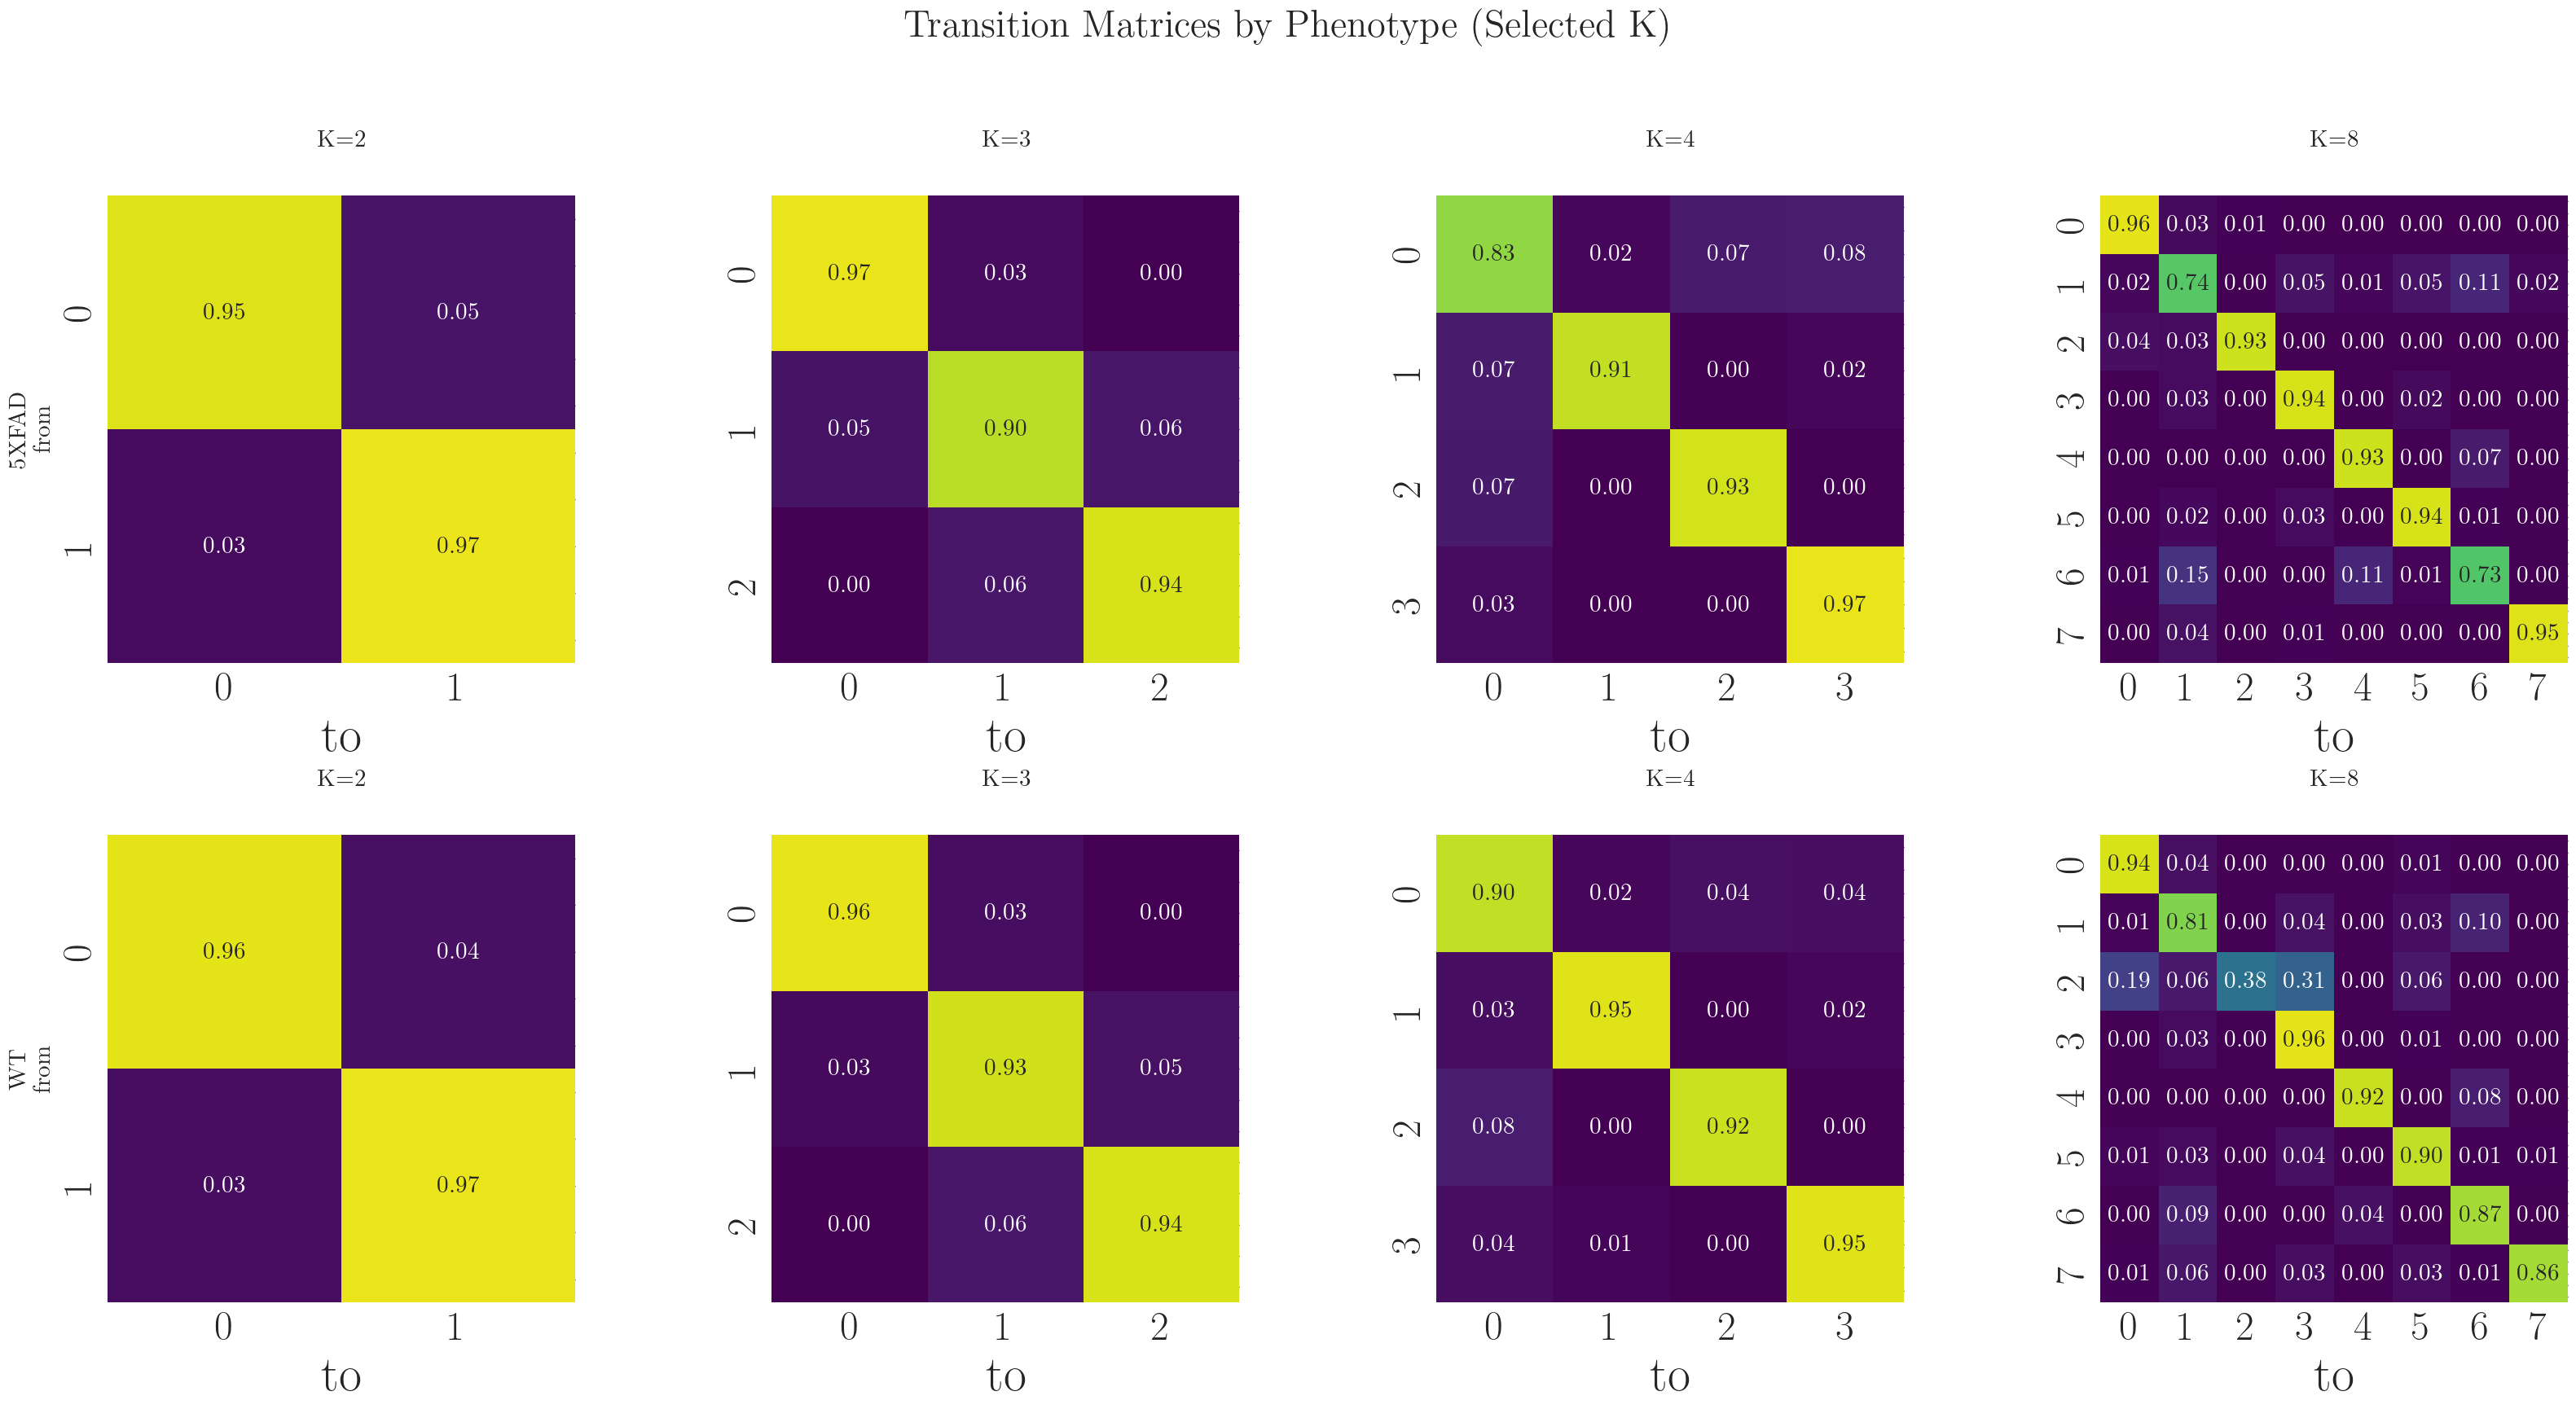

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# --- Select specific Ks ---
Ks_selected = [2, 3, 4, 8]  # replace with your desired Ks
phenotypes = sorted({trial.notes['group'] for trial in trials})
n_K = len(Ks_selected)
n_G = len(phenotypes)

# Helper: Estimate transition matrix from list of sequences
def estimate_transition_matrix(seqs, K):
    A = np.zeros((K, K))
    for seq in seqs:
        for i, j in zip(seq[:-1], seq[1:]):
            A[i, j] += 1
    row_sums = A.sum(axis=1, keepdims=True)
    with np.errstate(invalid='ignore'):
        A = np.divide(A, row_sums, where=row_sums != 0)
    return A

# Create subplot grid: rows = phenotypes, cols = selected Ks
fig, axes = plt.subplots(n_G, n_K, figsize=(4 * n_K, 4 * n_G))

for row, group in enumerate(phenotypes):
    for col, K in enumerate(Ks_selected):
        ax = axes[row, col] if n_G > 1 else axes[col]

        # Get sequences of this group at this K
        seqs = [seq for seq, trial in zip(states[K], trials) if trial.notes['group'] == group]

        if len(seqs) == 0:
            ax.axis('off')
            continue

        A = estimate_transition_matrix(seqs, K)
        sns.heatmap(A, annot=True, fmt='.2f', cbar=False, ax=ax,
                    vmin=0, vmax=1, square=True, cmap='viridis')

        ax.set_title(f'K={K}', fontsize=10)
        ax.set_xlabel('to')
        if col == 0:
            ax.set_ylabel(f'{group}\nfrom', fontsize=10)
        else:
            ax.set_ylabel("")

# Layout tweaks
plt.suptitle('Transition Matrices by Phenotype (Selected K)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

## Other

In [5]:
names = [trial.trial for trial in scaled]


2023-08-25_14-20-15
2023-08-25_15-32-14
2023-08-25_16-48-03
2023-08-25_17-48-53
2023-08-25_18-47-30
2023-08-25_19-39-21
2023-08-25_20-33-11
2023-08-25_21-35-02
2023-08-25_22-02-17
2023-08-25_23-24-25
2023-08-26_00-12-57
2023-08-26_00-58-14
2023-08-26_01-43-12
2023-08-26_02-33-36
2023-09-06_15-06-20
2023-09-06_17-32-01
2023-09-06_19-26-36
